Author : Yashasvi Seth


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from graph import Graph, has_cycle # Ensure graph.py is in the same folder


In [2]:
def create_random_graph(i, j):
    """
    Returns a Graph with i nodes and j edges.
    Ensures no 'multiples' (duplicate edges).
    """
    max_possible_edges = i * (i - 1) // 2
    j = min(j, max_possible_edges) # Safety cap

    G = Graph(i)
    
    # Generate all possible unique edge pairs
    all_possible_edges = []
    for u in range(i):
        for v in range(u + 1, i):
            all_possible_edges.append((u, v))
            
    # Randomly select j edges
    selected_edges = random.sample(all_possible_edges, j)
    
    for u, v in selected_edges:
        G.add_edge(u, v)
        
    return G

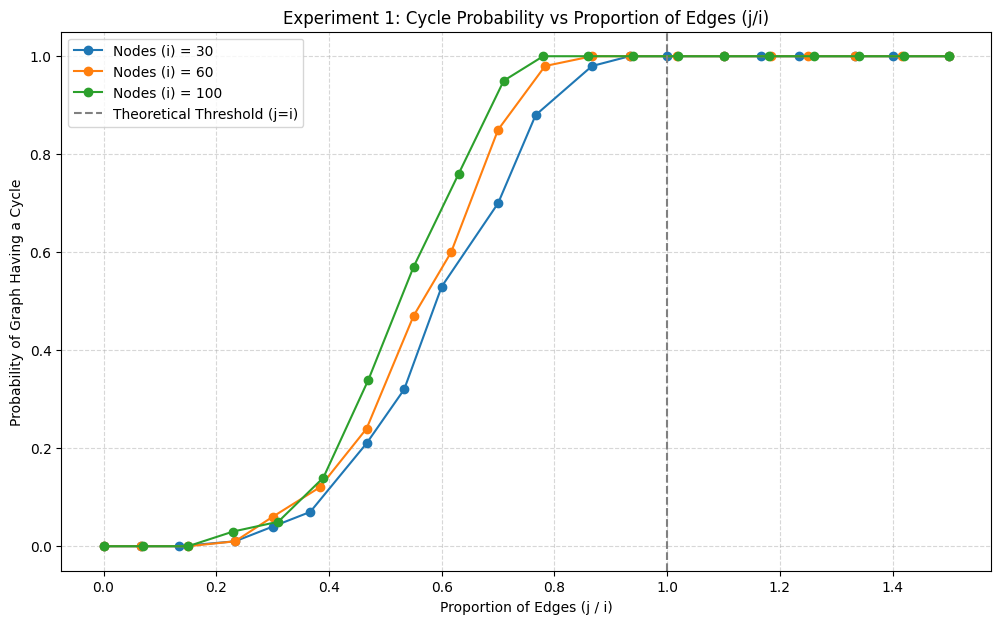

In [3]:
def run_cycle_experiment(node_list, trials=50):
    plt.figure(figsize=(12, 7))
    
    for n in node_list:
        # We vary the number of edges from 0 up to 1.5 * n
        edge_counts = np.linspace(0, 1.5 * n, 20, dtype=int)
        proportions = []
        probabilities = []

        for j in edge_counts:
            cycle_count = 0
            for _ in range(trials):
                G = create_random_graph(n, j)
                if has_cycle(G):
                    cycle_count += 1
            
            probabilities.append(cycle_count / trials)
            proportions.append(j / n) # Normalize edges by number of nodes
            
        plt.plot(proportions, probabilities, marker='o', label=f'Nodes (i) = {n}')

    plt.title('Experiment 1: Cycle Probability vs Proportion of Edges (j/i)')
    plt.xlabel('Proportion of Edges (j / i)')
    plt.ylabel('Probability of Graph Having a Cycle')
    plt.axvline(x=1.0, color='gray', linestyle='--', label='Theoretical Threshold (j=i)')
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

# Run for different graph sizes to compare
run_cycle_experiment(node_list=[30, 60, 100], trials=100)